In [1]:
using Plots
using StatsBase
using DataFrames
using CSV
using Pkg
using Clustering
using Statistics
using GLM

# MATRICES Y VECTORES

In [2]:
matriz = [7 8 9;
          6 5 4]

2×3 Matrix{Int64}:
 7  8  9
 6  5  4

In [3]:
vector = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [4]:
matriz * vector

2-element Vector{Int64}:
 50
 28

Sintaxis muy facil y amigable

# BASE DE DATOS: SPOTIFY SONGS

In [5]:
data = CSV.read("C:/Users/oscar/Documents/ITESO/Septimo Semestre UBA/Teoría de lenguaje/tp_julia/universal_top_spotify_songs.csv", DataFrame)

Row,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
,String31,String,String,Int64,Int64,Int64,String3?,Date,Int64,Bool,Int64,String,Date,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,missing,2023-11-06,73,true,183550,GOLDEN,2023-11-03,0.79,0.831,11,-4.185,1,0.044,0.312,0.0,0.0797,0.872,124.987,4
2,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,Jung Kook,2,0,48,missing,2023-11-06,83,false,206019,GOLDEN,2023-11-03,0.711,0.809,2,-4.389,0,0.0955,0.0447,0.0,0.339,0.816,106.017,4
3,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,4,missing,2023-11-06,99,true,131872,greedy,2023-09-15,0.75,0.733,6,-3.18,0,0.0319,0.256,0.0,0.114,0.844,111.018,1
4,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,4,0,2,missing,2023-11-06,99,false,184061,Si No Estás,2022-09-23,0.537,0.421,5,-8.72,1,0.0285,0.827,0.0,0.138,0.524,98.224,4
5,1Iq8oo9XkmmvCQiGOfORiz,Is It Over Now? (Taylor's Version) (From The Vault),Taylor Swift,5,0,-4,missing,2023-11-06,92,false,229477,1989 (Taylor's Version),2023-10-26,0.596,0.658,0,-7.346,1,0.036,0.0504,0.0,0.127,0.176,100.012,4
6,7iQXYTyuG13aoeHxGG28Nh,PERRO NEGRO,"Bad Bunny, Feid",6,2,2,missing,2023-11-06,97,true,162767,nadie sabe lo que va a pasar mañana,2023-10-13,0.911,0.778,5,-2.248,1,0.262,0.0887,2.16e-5,0.179,0.345,96.057,4
7,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,7,-1,4,missing,2023-11-06,89,true,230480,Scarlet,2023-09-20,0.864,0.556,2,-7.683,0,0.194,0.255,3.85e-6,0.112,0.726,99.974,4
8,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,8,1,6,missing,2023-11-06,100,false,178426,Lover,2019-08-23,0.552,0.702,9,-5.707,1,0.157,0.117,2.06e-5,0.105,0.564,169.994,4
9,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,9,1,3,missing,2023-11-06,98,true,267194,nadie sabe lo que va a pasar mañana,2023-10-13,0.787,0.621,4,-5.009,0,0.068,0.15,0.000402,0.58,0.13,139.056,4


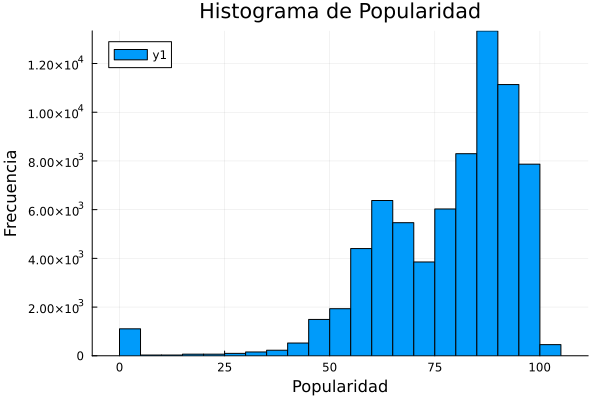

In [6]:
# Visualización básica
# Histograma de la popularidad
histogram(data.popularity, bins=20, xlabel="Popularidad",
    ylabel="Frecuencia", title="Histograma de Popularidad")

Como podemos ver en el histograma, la mayoría de canciones contenidas en este Top de Spotify songs tienen rangos altos de popularidad, por lo que podemos considerar esta categoría con un valor muy importante a tener en cuenta.

Vamos a ver si existen ciertos patrones que nos permitan tener una popularidad más grande y como funcionan las demás características en relación a Popularidad.

In [7]:
columnas_clave = [:daily_movement, :weekly_movement, :popularity, :is_explicit, :duration_ms, 
    :danceability, :energy, :loudness, :speechiness, :acousticness, :instrumentalness, :liveness, :valence,
    :tempo, :time_signature]

15-element Vector{Symbol}:
 :daily_movement
 :weekly_movement
 :popularity
 :is_explicit
 :duration_ms
 :danceability
 :energy
 :loudness
 :speechiness
 :acousticness
 :instrumentalness
 :liveness
 :valence
 :tempo
 :time_signature

In [8]:
# Análisis de estadísticas descriptivas
describe_cc = describe(data[:, columnas_clave])
describe_cc

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,daily_movement,1.68859,-46,0.0,49,0,Int64
2,weekly_movement,8.61763,-46,2.0,49,0,Int64
3,popularity,77.3949,0,83.0,100,0,Int64
4,is_explicit,0.386757,false,0.0,true,0,Bool
5,duration_ms,1.94797e5,0,188571.0,641941,0,Int64
6,danceability,0.690966,0.187,0.706,0.974,0,Float64
7,energy,0.647103,0.0242,0.67,0.997,0,Float64
8,loudness,-6.63643,-27.491,-6.197,1.155,0,Float64
9,speechiness,0.107969,0.0232,0.0643,0.784,0,Float64


Podemos darnos una idea de los valores más interesantes para estar dentro del Ranking. Podemos identificar el promedio de estas variables, y compararlo con la mediana también puede ser clave, para tener valores más certeros.

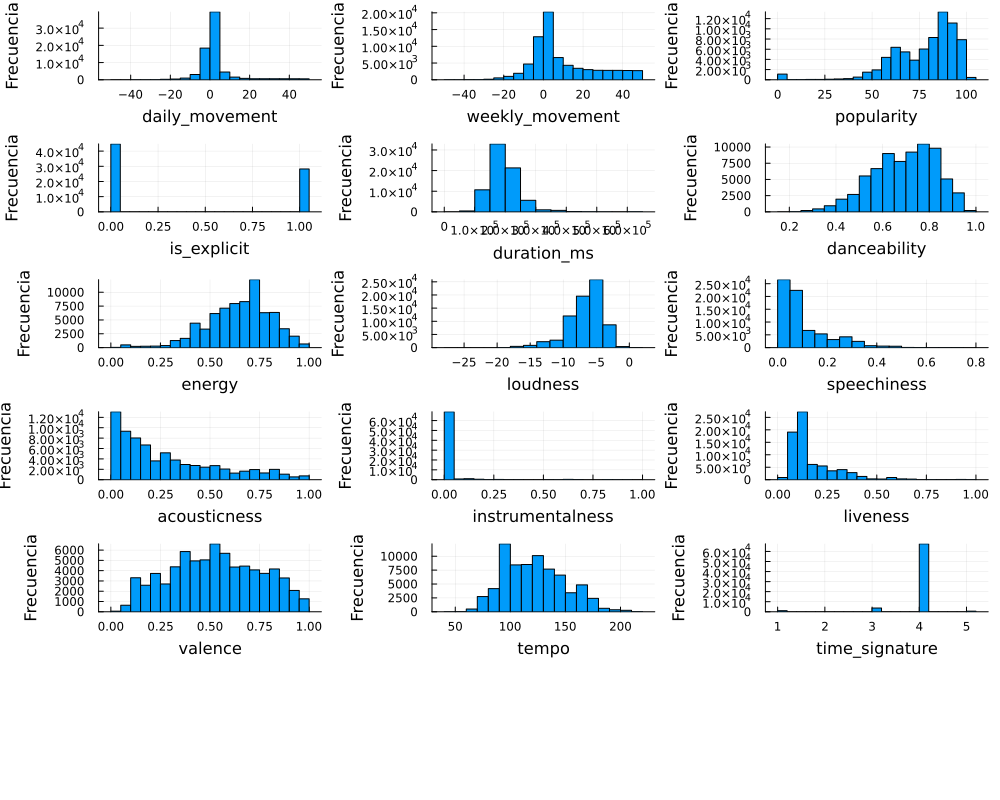

In [9]:
# Columnas que deseas incluir en el histograma
columnas_clave = [:daily_movement, :weekly_movement, :popularity, :is_explicit, :duration_ms,
    :danceability, :energy, :loudness, :speechiness, :acousticness, :instrumentalness, :liveness, :valence,
    :tempo, :time_signature]

# Configurar el tamaño de la figura general
plot_size = (1000, 800)  # Puedes ajustar estos valores según tus necesidades

# Crear histogramas para las columnas seleccionadas con tamaño personalizado
histogramas = [histogram(data[:, col], bins=20, xlabel=string(col), ylabel="Frecuencia", legend=false, size=plot_size) for col in columnas_clave]

# Calcular el número de filas y columnas necesarias
num_filas = div(length(columnas_clave), 2)
num_columnas = ceil(Int, length(columnas_clave) / num_filas)

# Mostrar los histogramas en filas de dos
plot(histogramas..., layout=(num_filas, num_columnas))

In [10]:
# Descubrir patrones de popularidad
# Correlación entre las diferentes variables y la popularidad
correlation_matrix = cor(Matrix(data[:, [:popularity, :danceability, :energy, :loudness, 
                :duration_ms, :speechiness, :acousticness, :liveness]]))

8×8 Matrix{Float64}:
  1.0         -0.00237374  …  -0.0456677    0.0376414  -0.0165687
 -0.00237374   1.0             0.234111    -0.277849   -0.104453
  0.00612875   0.226191       -0.00119822  -0.577739    0.106003
  0.128701     0.22348        -0.0612726   -0.451858    0.0828442
  0.01375     -0.214699       -0.0195895    0.024523   -0.022559
 -0.0456677    0.234111    …   1.0         -0.026507   -0.0090121
  0.0376414   -0.277849       -0.026507     1.0        -0.0647969
 -0.0165687   -0.104453       -0.0090121   -0.0647969   1.0

Realmente no tenemos valores tan altos en la correlación, hablando específicamente de la variable que más nos interesa, popularidad. Por lo que no podríamos concluir que alguno de estos parámetros afecten directamente.

Por ejemplo, Energy y Loudness tienen una correlación positiva bastante grande, pero eso no nos dice nada respecto a la popularidad.

In [11]:
# Análisis de movimientos diarios y semanales
println("Análisis de Movimientos Diarios:")
describe(data.daily_movement)

println("\nAnálisis de Movimientos Semanales:")
describe(data.weekly_movement)


Análisis de Movimientos Diarios:
Summary Stats:
Length:         72958
Missing Count:  0
Mean:           1.688588
Std. Deviation: 8.776192
Minimum:        -46.000000
1st Quartile:   -1.000000
Median:         0.000000
3rd Quartile:   2.000000
Maximum:        49.000000
Type:           Int64

Análisis de Movimientos Semanales:
Summary Stats:
Length:         72958
Missing Count:  0
Mean:           8.617629
Std. Deviation: 16.282539
Minimum:        -46.000000
1st Quartile:   -1.000000
Median:         2.000000
3rd Quartile:   18.000000
Maximum:        49.000000
Type:           Int64


In [12]:
# Calcular el promedio de valores positivos
promedio_positivos = mean(data[data.daily_movement .> 0, :daily_movement], dims=1)

# Calcular el promedio de valores negativos
promedio_negativos = mean(data[data.daily_movement .< 0, :daily_movement], dims=1)

# Mostrar los resultados
println("Promedio de valores positivos: ", promedio_positivos[1])
println("Promedio de valores negativos: ", promedio_negativos[1])

Promedio de valores positivos: 7.722637489618315
Promedio de valores negativos: -3.916331907908946


In [13]:
#### Calcular el promedio de la popularidad por fecha usando combine
mean_popularity_over_time = combine(groupby(data, :snapshot_date), :popularity => mean => :mean_popularity)

# Mostrar el resultado
println(mean_popularity_over_time)

20×2 DataFrame
 Row │ snapshot_date  mean_popularity 
     │ Dates.Date     Float64         
─────┼────────────────────────────────
   1 │ 2023-11-06             78.0772
   2 │ 2023-11-05             71.7917
   3 │ 2023-11-04             78.7512
   4 │ 2023-11-03             79.0418
   5 │ 2023-11-02             78.6932
   6 │ 2023-11-01             78.811
   7 │ 2023-10-31             78.5592
   8 │ 2023-10-30             77.8874
   9 │ 2023-10-29             61.9874
  10 │ 2023-10-28             78.6489
  11 │ 2023-10-27             78.389
  12 │ 2023-10-26             78.8661
  13 │ 2023-10-25             78.7137
  14 │ 2023-10-24             78.9087
  15 │ 2023-10-23             78.8693
  16 │ 2023-10-22             76.5247
  17 │ 2023-10-21             78.9202
  18 │ 2023-10-20             78.9676
  19 │ 2023-10-19             78.7957
  20 │ 2023-10-18             78.7201


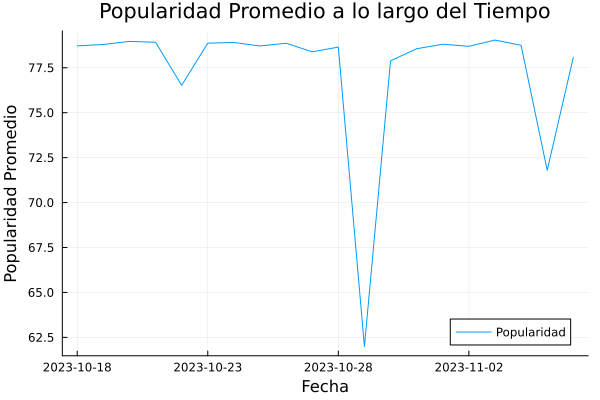

In [14]:
# Gráfico de línea para mostrar el promedio de popularidad a lo largo del tiempo
plot(mean_popularity_over_time.snapshot_date, mean_popularity_over_time.mean_popularity, xlabel="Fecha", 
    ylabel="Popularidad Promedio", title="Popularidad Promedio a lo largo del Tiempo", label="Popularidad", fmt=:png)

In [15]:
function kmeans_clustering(data::DataFrame, features::Tuple{Symbol, Symbol}, num_clusters::Int)
    # Extraemos las características de la data
    caracteristicas = select(data, features...)

    # Realizamos el agrupamiento utilizando K-means
    resultados_kmeans = kmeans(Matrix(caracteristicas)', num_clusters)

    # Obtenemos las etiquetas de cluster asignadas a cada punto de datos
    etiquetas_clusters = resultados_kmeans.assignments

    # Visualizamos los datos agrupados por colores
    scatter(caracteristicas[!, features[1]], caracteristicas[!, features[2]], group=etiquetas_clusters,
        xlabel=string(features[1]), ylabel=string(features[2]), 
        title="$(features[1]) - $(features[2])")


    # Muestra los centros de los clusters como círculos rojos
    scatter!(resultados_kmeans.centers[1, :], resultados_kmeans.centers[2, :], color=:red, markersize=10, label="Centros de Clusters")
end

kmeans_clustering (generic function with 1 method)

In [16]:
#Popularity - Danceability
#kmeans_clustering(data, (:popularity, :danceability), 2)

In [17]:
#Popularity - Energy 
#kmeans_clustering(data, (:popularity, :energy), 2)

In [18]:
#Popularity - Duration_ms
#kmeans_clustering(data, (:popularity, :duration_ms), 2)

In [19]:
#Popularity - Loudness
#kmeans_clustering(data, (:popularity, :loudness), 2)

## MUESTREO DE DATOS

In [20]:
using StatsBase

function kmeans_clustering(data::DataFrame, features::Tuple{Symbol, Symbol}, num_clusters::Int)
    # Muestreo aleatorio de datos
    indices_muestreo = sample(1:nrow(data), min(1000, nrow(data)), replace=false)
    data_muestreada = data[indices_muestreo, :]

    # Extraemos las características de la data
    caracteristicas = select(data_muestreada, features...)

    # Resto del código sigue igual
    resultados_kmeans = kmeans(Matrix(caracteristicas)', num_clusters)
    etiquetas_clusters = resultados_kmeans.assignments

    scatter(caracteristicas[!, features[1]], caracteristicas[!, features[2]], group=etiquetas_clusters,
        xlabel=string(features[1]), ylabel=string(features[2]), 
        title="$(features[1]) - $(features[2])")

    scatter!(resultados_kmeans.centers[1, :], resultados_kmeans.centers[2, :], color=:red, markersize=10, label="Centros de Clusters")
end



kmeans_clustering (generic function with 1 method)

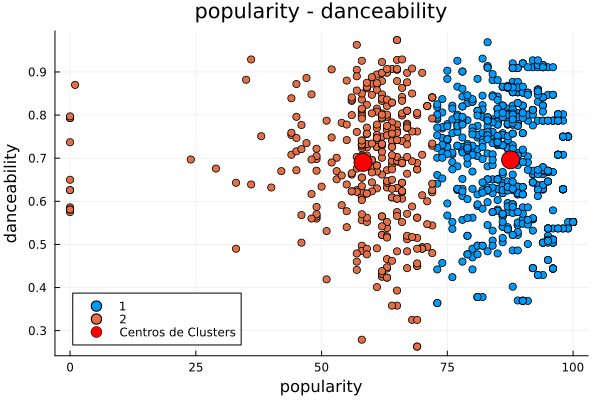

In [21]:
kmeans_clustering(data, (:popularity, :danceability), 2)

## GRÁFICO INTERACTIVO

In [22]:
using PlotlyJS

function kmeans_clustering_interactivo(data::DataFrame, features::Tuple{Symbol, Symbol}, num_clusters::Int)
    # Muestreo aleatorio de datos
    indices_muestreo = sample(1:nrow(data), min(1000, nrow(data)), replace=false)
    data_muestreada = data[indices_muestreo, :]

    # Extraemos las características de la data
    caracteristicas = select(data_muestreada, features...)

    # Resto del código sigue igual
    resultados_kmeans = kmeans(Matrix(caracteristicas)', num_clusters)
    etiquetas_clusters = resultados_kmeans.assignments

    # Cambia a un gráfico interactivo con PlotlyJS
    plotly()
    scatter(caracteristicas[!, features[1]], caracteristicas[!, features[2]], group=etiquetas_clusters,
        xlabel=string(features[1]), ylabel=string(features[2]), 
        title="$(features[1]) - $(features[2])")

    scatter!(resultados_kmeans.centers[1, :], resultados_kmeans.centers[2, :], color=:red, markersize=10, label="Centros de Clusters")
end


WebIO._IJuliaInit()

kmeans_clustering_interactivo (generic function with 1 method)

In [23]:
kmeans_clustering_interactivo(data, (:popularity, :danceability), 2)

## FILTRADO POR PAÍS

### Argentina

In [24]:
# Filtrar por país ('AR' en este caso), excluyendo valores Missing
data_ar = filter(row -> coalesce(get(row, :country, missing), "") == "AR", data)

Row,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
,String31,String,String,Int64,Int64,Int64,String3?,Date,Int64,Bool,Int64,String,Date,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,7aPsseax6rNFyipHn9A5CR,La Morocha,"Luck Ra, BM",1,2,0,AR,2023-11-06,85,false,134144,La Morocha,2023-07-07,0.753,0.77,7,-5.751,1,0.0341,0.0966,0.0,0.279,0.971,149.144,4
2,6Es8Sk3xe1HiJ2MXCfHHwR,La_Original.mp3,"Emilia, TINI",2,-1,48,AR,2023-11-06,60,false,140625,.mp3,2023-11-03,0.833,0.809,5,-2.751,0,0.0381,0.0836,0.0,0.112,0.905,128.055,4
3,3cDyocF0Ibdfs1SFQk5cLZ,Lollipop,Darell,3,-1,-1,AR,2023-11-06,95,true,199946,EVERYBODY GO TO THE DISCOTEK,2023-07-28,0.822,0.711,6,-4.943,1,0.0668,0.179,1.46e-5,0.083,0.934,102.984,4
4,4sl3IoHskl2Kbdy27gZ4yn,Una Foto,Mesita,4,1,-1,AR,2023-11-06,83,false,122500,Una Foto,2023-08-15,0.811,0.649,6,-5.089,1,0.111,0.343,0.0,0.121,0.756,96.076,4
5,7HrgGbnNKZKhBL70aFKpXk,Linda - Remix,"Marka Akme, DJ Tao, Lauty Gram, Migrantes, Peipper",5,1,0,AR,2023-11-06,81,false,234105,Linda (Remix),2023-09-27,0.78,0.63,9,-4.719,1,0.105,0.307,0.0,0.18,0.789,87.999,4
6,6hv8hai0yo19JF2c6pppj6,GTA.mp3,Emilia,6,-2,44,AR,2023-11-06,56,false,151653,.mp3,2023-11-03,0.882,0.783,7,-4.023,0,0.0985,0.0605,4.74e-5,0.141,0.555,127.035,4
7,4SW9gHnW8NfKOdqmh0ij45,Fruto,"Bizarrap, Milo j",7,1,-3,AR,2023-11-06,91,false,132294,en dormir sin Madrid,2023-10-04,0.801,0.517,2,-8.205,0,0.269,0.494,1.45e-6,0.355,0.923,160.254,4
8,2HafqoJbgXdtjwCOvNEF14,Si No Estás,iñigo quintero,8,-1,2,AR,2023-11-06,99,false,184061,Si No Estás,2022-09-23,0.537,0.421,5,-8.72,1,0.0285,0.827,0.0,0.138,0.524,98.224,4
9,5zDEMy7lLJ1W7vauTrH5mb,Lágrimas | CROSSOVER #4,"Big One, TINI, BM",9,1,-1,AR,2023-11-06,81,false,167419,Lágrimas | CROSSOVER #4,2023-10-10,0.796,0.607,8,-5.076,1,0.0435,0.079,0.0,0.0599,0.834,93.018,4


In [25]:
# Visualización básica
# Histograma de la popularidad
histogram(data_ar.popularity, bins=20, xlabel="Popularidad",
    ylabel="Frecuencia", title="Histograma de Popularidad")

In [26]:
# Descubrir patrones de popularidad
# Correlación entre las diferentes variables y la popularidad
correlation_matrix = cor(Matrix(data_ar[:, [:popularity, :danceability, :energy, :loudness, 
                :duration_ms, :speechiness, :acousticness, :liveness]]))

8×8 Matrix{Float64}:
  1.0         0.162958   -0.0747194  …   0.074195    0.13698     0.0347164
  0.162958    1.0         0.274642       0.0830226  -0.185708   -0.182428
 -0.0747194   0.274642    1.0           -0.201419   -0.237203   -0.065586
 -0.0682691   0.22512     0.750954      -0.131313   -0.202478   -0.14181
  0.119117    0.087036    0.0976179     -0.205765   -0.167902   -0.0878329
  0.074195    0.0830226  -0.201419   …   1.0         0.0925001   0.0691668
  0.13698    -0.185708   -0.237203       0.0925001   1.0         0.0369457
  0.0347164  -0.182428   -0.065586       0.0691668   0.0369457   1.0

In [27]:
kmeans_clustering_interactivo(data_ar, (:popularity, :danceability), 1)

### México

In [28]:
# Filtrar por país ('MX' en este caso), excluyendo valores Missing
data_mx = filter(row -> coalesce(get(row, :country, missing), "") == "MX", data)

Row,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
,String31,String,String,Int64,Int64,Int64,String3?,Date,Int64,Bool,Int64,String,Date,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,6CvTEtGagmzQvkUzzyKR9k,HARLEY QUINN,"Fuerza Regida, Marshmello",1,0,1,MX,2023-11-06,88,true,143327,Pa las Baby's Y Belikeada,2023-10-20,0.815,0.741,1,-6.04,1,0.0569,0.0277,0.0183,0.219,0.591,125.031,4
2,6uIIdjYTxxpWOyWuVXrKQO,Que Onda,"Calle 24, Chino Pacas, Fuerza Regida",2,0,-1,MX,2023-11-06,94,true,191466,Que Onda,2023-08-30,0.808,0.944,10,-4.863,0,0.0408,0.183,1.11e-6,0.138,0.937,124.934,3
3,3FvTHuefYV6TxE3Kseqno8,LOU LOU,"Gabito Ballesteros, Natanael Cano",3,0,0,MX,2023-11-06,88,true,188000,LOU LOU,2023-10-19,0.739,0.579,7,-8.361,0,0.0509,0.0622,0.0,0.454,0.694,130.002,3
4,7mXuWTczZNxG5EDcjFEuJR,LADY GAGA,"Peso Pluma, Gabito Ballesteros, Junior H",4,0,0,MX,2023-11-06,95,true,212878,GÉNESIS,2023-06-29,0.646,0.736,5,-7.118,0,0.0449,0.216,0.0,0.415,0.873,140.098,3
5,2TJKY0WSFufZOzbRNgl6zE,ELOVRGA,"Alex Favela, Grupo Marca Registrada, Joaquin Medina",5,0,1,MX,2023-11-06,91,true,194769,ELOVRGA,2023-08-18,0.793,0.476,5,-10.515,0,0.0406,0.132,0.0,0.115,0.578,129.992,4
6,7iQXYTyuG13aoeHxGG28Nh,PERRO NEGRO,"Bad Bunny, Feid",6,0,-1,MX,2023-11-06,97,true,162767,nadie sabe lo que va a pasar mañana,2023-10-13,0.911,0.778,5,-2.248,1,0.262,0.0887,2.16e-5,0.179,0.345,96.057,4
7,4bw8mcDUSRWfQo63ZTYRnU,Según Quién,"Maluma, Carin Leon",7,0,2,MX,2023-11-06,89,true,142334,Don Juan,2023-08-25,0.909,0.762,9,-3.974,1,0.0643,0.434,0.0,0.0856,0.843,101.987,3
8,6RcAHyC5sAUIbPTkhOQwd8,Y LLORO,Junior H,8,0,-1,MX,2023-11-06,90,true,179013,$AD BOYZ 4 LIFE II,2023-10-05,0.728,0.589,7,-7.115,1,0.0376,0.424,7.78e-6,0.166,0.767,77.475,4
9,5RqSsdzTNPX1uzkmlHCFvK,QLONA,"KAROL G, Peso Pluma",9,0,-1,MX,2023-11-06,94,true,172797,MAÑANA SERÁ BONITO (BICHOTA SEASON),2023-08-10,0.841,0.738,7,-7.455,0,0.307,0.52,0.0,0.0892,0.484,169.918,4


In [29]:
# Visualización básica
# Histograma de la popularidad
histogram(data_mx.popularity, bins=20, xlabel="Popularidad",
    ylabel="Frecuencia", title="Histograma de Popularidad")

In [30]:
# Descubrir patrones de popularidad
# Correlación entre las diferentes variables y la popularidad
correlation_matrix = cor(Matrix(data_mx[:, [:popularity, :danceability, :energy, :loudness, 
                :duration_ms, :speechiness, :acousticness, :liveness]]))

8×8 Matrix{Float64}:
  1.0          0.0170088  -0.133817   -0.0115463  …   0.136639    -0.00631043
  0.0170088    1.0         0.216273    0.115264      -0.267022    -0.012774
 -0.133817     0.216273    1.0         0.625903      -0.280241     0.0412188
 -0.0115463    0.115264    0.625903    1.0           -0.213236     0.0569017
  0.124408    -0.0514648  -0.352818   -0.347325       0.101267     0.196689
  0.0767782    0.296022   -0.0577823   0.12327    …  -0.00404708  -0.16467
  0.136639    -0.267022   -0.280241   -0.213236       1.0         -0.250818
 -0.00631043  -0.012774    0.0412188   0.0569017     -0.250818     1.0

In [31]:
kmeans_clustering_interactivo(data_mx, (:popularity, :acousticness), 1)

# MACROS 

In [32]:
macro sayhello(name)
    return :(println("Hello, ", $name, "!"))
end

@sayhello "Julia"


Hello, Julia!


In [33]:
@time begin
    correlation_matrix = cor(Matrix(data_mx[:, [:popularity, :danceability, :energy, :loudness, 
                :duration_ms, :speechiness, :acousticness, :liveness]]))
end

  0.000136 seconds (57 allocations: 192.766 KiB)


8×8 Matrix{Float64}:
  1.0          0.0170088  -0.133817   -0.0115463  …   0.136639    -0.00631043
  0.0170088    1.0         0.216273    0.115264      -0.267022    -0.012774
 -0.133817     0.216273    1.0         0.625903      -0.280241     0.0412188
 -0.0115463    0.115264    0.625903    1.0           -0.213236     0.0569017
  0.124408    -0.0514648  -0.352818   -0.347325       0.101267     0.196689
  0.0767782    0.296022   -0.0577823   0.12327    …  -0.00404708  -0.16467
  0.136639    -0.267022   -0.280241   -0.213236       1.0         -0.250818
 -0.00631043  -0.012774    0.0412188   0.0569017     -0.250818     1.0

In [34]:
@allocated begin
    correlation_matrix = cor(Matrix(data_mx[:, [:popularity, :danceability, :energy, :loudness, 
                :duration_ms, :speechiness, :acousticness, :liveness]]))
end

197392

# FUNCIONES ANÓNIMAS

In [35]:
# Sintaxis general de una función anónima
f = x -> x^2

#9 (generic function with 1 method)

In [36]:
# Uso de la función anónima
resultado = f(3)  

9

In [37]:
# También se pueden utilizar directamente en lugar de asignarlas a una variable
resultado_2 = (x -> x^3)(2)  

8

# MULTIPLE DISPATCH

Capacidad de definir y llamar a funciones según los tipos de varios argumentos, en lugar de solo el tipo de un único argumento, como ocurre en la mayoría de los lenguajes de programación.

Para entender el despacho múltiple en Julia, observemos el operador **+**

Si llamamos *methods()* sobre **+**, podemos ver todas las definiciones de **+**

In [38]:
methods(+)

# 299 methods for generic function "+" from Base:
   [1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
     @ int.jl:87
   [2] +(x::T, y::T) where T<:Union{Float16, Float32, Float64}
     @ float.jl:408
   [3] +(c::Union{UInt16, UInt32, UInt8}, x::BigInt)
     @ Base.GMP gmp.jl:539
   [4] +(c::Union{Int16, Int32, Int8}, x::BigInt)
     @ Base.GMP gmp.jl:545
   [5] +(c::Union{UInt16, UInt32, UInt8}, x::BigFloat)
     @ Base.MPFR mpfr.jl:407
   [6] +(c::Union{Int16, Int32, Int8}, x::BigFloat)
     @ Base.MPFR mpfr.jl:415
   [7] +(c::Union{Float16, Float32, Float64}, x::BigFloat)
     @ Base.MPFR mpfr.jl:423
   [8] +(x::Union{Dates.CompoundPeriod, Dates.Period})
     @ Dates C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\Dates\src\periods.jl:342
   [9] +(a::Union{LMS, XYZ}, b::Union{LMS, XYZ})
     @ Colors C:\Users\oscar\.julia\packages\Colors\mIuXl\src\algorithms.jl:4
  [10] +(J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\uniformscaling.jl:149
  [11] +(J1::LinearAlgebra.UniformScaling, J2::LinearAlgebra.UniformScaling)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\uniformscaling.jl:150
  [12] +(J::LinearAlgebra.UniformScaling{T}, A::SparseArrays.AbstractSparseMatrixCSC{Tv, Ti}) where {T<:Number, Tv, Ti}
     @ SparseArrays C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\SparseArrays\src\sparsematrix.jl:4100
  [13] +(a::LinearAlgebra.UniformScaling, b::StaticArraysCore.StaticArray{Tuple{N, M}, T, 2} where {N, M, T})
     @ StaticArrays C:\Users\oscar\.julia\packages\StaticArrays\cZ1ET\src\linalg.jl:30
  [14] +(x::LinearAlgebra.UniformScaling, H::LinearAlgebra.UpperHessenberg)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\hessenberg.jl:112
  [15] +(J::LinearAlgebra.UniformScaling, x::Number)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\uniformscaling.jl:144
  [16] +(J::LinearAlgebra.UniformScaling, F::LinearAlgebra.Hessenberg)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\hessenberg.jl:648
  [17] +(a::LinearAlgebra.UniformScaling, b::PDMats.AbstractPDMat)
     @ PDMats C:\Users\oscar\.julia\packages\PDMats\bzppG\src\addition.jl:43
  [18] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Bidiagonal{var"#s972", V} where {var"#s972"<:Number, V<:AbstractVector{var"#s972"}})
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\special.jl:260
  [19] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Diagonal{var"#s972", V} where {var"#s972"<:Number, V<:AbstractVector{var"#s972"}})
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\special.jl:265
  [20] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Tridiagonal{var"#s972", V} where {var"#s972"<:Number, V<:AbstractVector{var"#s972"}})
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\special.jl:250
  [21] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.SymTridiagonal{var"#s972", V} where {var"#s972"<:Number, V<:AbstractVector{var"#s972"}})
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\special.jl:255
  [22] +(J::LinearAlgebra.UniformScaling, B::BitMatrix)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\uniformscaling.jl:152
  [23] +(J::LinearAlgebra.UniformScaling, A::AbstractMatrix)
     @ LinearAlgebra C:\Users\oscar\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\

Podemos usar el macro de *@which* para saber qué método en particular estamos usando de **+**

Distintos métodos se usan en cada uno de estos ejemplos.

In [39]:
@which 3 + 3

+(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
     @ Base int.jl:87

In [40]:
@which 3.0 + 3.0 

+(x::T, y::T) where T<:Union{Float16, Float32, Float64}
     @ Base float.jl:408

In [41]:
@which 3 + 3.0

+(x::Number, y::Number)
     @ Base promotion.jl:410

Aún más, pues podemos definir nuevos métodos de +.

Primero tenemos que importar + de Base.

In [42]:
import Base: +

Digamos que queremos concatenar elementos con +. Sin extender el método, no funciona

In [43]:
"hello " + "world!"

LoadError: MethodError: no method matching +(::String, ::String)
String concatenation is performed with [36m*[39m (See also: https://docs.julialang.org/en/v1/manual/strings/#man-concatenation).

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:578[24m[39m


In [44]:
@which "hello " + "world!"

LoadError: no unique matching method found for the specified argument types

Entonces agregamos a + un método que toma dos cadenas y las concatena     

In [45]:
+(x::String, y::String) = string(x, y)

+ (generic function with 300 methods)

In [46]:
"hello " + "world!"

"hello world!"

¡Funciona! Y si queremos más, podemos comprobarnos que Julia ha despachado sobre los tipos de "hello" y "world!", sobre el método que acabamos de definir

In [47]:
@which "hello " + "world!"

+(x::String, y::String)
     @ Main In[45]:1

# REGRESIÓN LINEAL

In [48]:
# Crear el modelo de regresión lineal
regresion_ar = lm(@formula(danceability ~ popularity), data_ar)

# Obtener resumen del modelo
println("Resumen del modelo:")
println(summary(regresion_ar))

Resumen del modelo:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [49]:
# Graficar el resultado de la regresión
scatter(data_ar.popularity, data_ar.danceability, label="Datos")
plot!(data_ar.popularity, predict(regresion_ar), label="Regresión Lineal", 
    xlabel="Popularity", ylabel="Danceability", legend=:top)

In [50]:
# Crear el modelo de regresión lineal
regresion_mx = lm(@formula(acousticness ~ popularity), data_mx)

# Obtener resumen del modelo
println("Resumen del modelo:")
println(summary(regresion_mx))

Resumen del modelo:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [51]:
# Graficar el resultado de la regresión
scatter(data_mx.popularity, data_mx.acousticness, label="Datos")
plot!(data_mx.popularity, predict(regresion_mx), label="Regresión Lineal", 
    xlabel="Popularity", ylabel="Acousticness", legend=:top)

# DISTRIBUIDOS

In [52]:
# Paso 1: Iniciar el sistema distribuido
using Distributed
addprocs(4)  # Agregar 4 procesos (puedes ajustar según el número de núcleos en tu máquina)

4-element Vector{Int64}:
 2
 3
 4
 5

In [53]:
# Paso 2: Cargar el paquete en todos los procesos
@everywhere using Distributed

In [54]:
# Paso 3: Función que imprime mensajes desde diferentes procesos
@everywhere function imprimir_mensaje(id::Int)
    println("Proceso $id: Hola desde el proceso $(myid())")
end

In [55]:
# Paso 4: Llamar a la función en paralelo
@distributed for i in 1:nprocs()
    imprimir_mensaje(i)
end

Task (runnable) @0x000001c53e8ba100

      From worker 2:	Proceso 1: Hola desde el proceso 2

Los mensajes se imprimen en un orden no determinista, ya que cada proceso puede ejecutarse de manera independiente y en paralelo. Esto demuestra la capacidad de distribuir tareas entre diferentes procesos en Julia.

# MANEJO DE MEMORIA

In [56]:
# Crear un vector de enteros
vector_enteros = [1, 2, 3, 4, 5]


      From worker 4:	Proceso 4: Hola desde el proceso 4

5-element Vector{Int64}:
 1
 2
 3
 4
 5


      From worker 3:	Proceso 3: Hola desde el proceso 3
      From worker 5:	Proceso 5: Hola desde el proceso 5

In [57]:
# Obtener el tamaño del vector en bytes
tamaño_en_bytes = sizeof(vector_enteros)
println("Tamaño del vector en bytes: $tamaño_en_bytes")


Tamaño del vector en bytes: 40


In [58]:
# Modificar el vector
push!(vector_enteros, 6)

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

      From worker 2:	Proceso 2: Hola desde el proceso 2


In [59]:
# Obtener el nuevo tamaño del vector en bytes
nuevo_tamaño_en_bytes = sizeof(vector_enteros)
println("Nuevo tamaño del vector en bytes: $nuevo_tamaño_en_bytes")

Nuevo tamaño del vector en bytes: 48


### Recolector de basura

In [60]:
# Crear una función que genera basura (un vector temporal)
function generar_basura()
    basura = rand(1:100, 1000)
    return sum(basura)
end

generar_basura (generic function with 1 method)

In [61]:
# Crear una función principal que utiliza la función que genera basura
function funcion_principal()
    resultado = generar_basura()
    println("Resultado: $resultado")
end

funcion_principal (generic function with 1 method)

In [62]:
# Obtener el uso de memoria antes de la ejecución
memoria_inicial = Sys.free_memory()
println("Uso de memoria antes de la ejecución: $memoria_inicial bytes")

Uso de memoria antes de la ejecución: 372207616 bytes


In [63]:
# Llamar a la función principal
funcion_principal()

Resultado: 50499


In [64]:
# Obtener el uso de memoria después de la ejecución
memoria_despues = Sys.free_memory()
println("Uso de memoria después de la ejecución: $memoria_despues bytes")

Uso de memoria después de la ejecución: 372088832 bytes


In [65]:
# Forzar la recolección de basura
GC.gc()

In [66]:
# Obtener el uso de memoria después de la recolección de basura
memoria_despues_gc = Sys.free_memory()
println("Uso de memoria después de la recolección de basura: $memoria_despues_gc bytes")

Uso de memoria después de la recolección de basura: 344723456 bytes


### Limpiar objetos innecesarios

In [67]:
x = rand(10^6)

1000000-element Vector{Float64}:
 0.03299958942338588
 0.5518833230774168
 0.981848205427228
 0.6311779063761946
 0.9264460117125989
 0.6850878992789495
 0.49969703780477337
 0.7685851101049462
 0.9669415068099293
 0.8043493582760819
 0.2651453734109581
 0.2437896017057517
 0.6148951808449
 ⋮
 0.540658998564843
 0.2666556156764893
 0.35791619599736435
 0.6045649908274143
 0.679012687220927
 0.25453381075874504
 0.5301429972275032
 0.8127433871594765
 0.11728224891711558
 0.5081037103255225
 0.5923881225503095
 0.9918550119920205

In [68]:
x

1000000-element Vector{Float64}:
 0.03299958942338588
 0.5518833230774168
 0.981848205427228
 0.6311779063761946
 0.9264460117125989
 0.6850878992789495
 0.49969703780477337
 0.7685851101049462
 0.9669415068099293
 0.8043493582760819
 0.2651453734109581
 0.2437896017057517
 0.6148951808449
 ⋮
 0.540658998564843
 0.2666556156764893
 0.35791619599736435
 0.6045649908274143
 0.679012687220927
 0.25453381075874504
 0.5301429972275032
 0.8127433871594765
 0.11728224891711558
 0.5081037103255225
 0.5923881225503095
 0.9918550119920205

In [69]:
# Al terminar de usar x
x = nothing  # Liberar la memoria

In [70]:
x

# PLUTO

Pluto.jl es un entorno interactivo para el lenguaje de programación Julia...

- Permite la ejecución de código de manera interactiva.
- Facilita la visualización de datos.
- Es ideal para la exploración y prototipado rápido.

In [71]:
#import Pkg
#Pkg.add("Pluto")

In [ ]:
import Pluto
Pluto.run()

┌ Info: 
└ Opening http://localhost:1234/?secret=y4L1B2TJ in your default browser... ~ have fun!
┌ Info: 
│ Press Ctrl+C in this terminal to stop Pluto
└ 


### `Bibliografía `

* https://docs.julialang.org/en/v1/

* https://help.juliahub.com/juliahub/stable/

* https://introajulia.org/#_el_primer_programa

* https://chifi.dev/weird-things-you-can-do-in-julia-3f10cacb8ef4

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Julia by Oscar Uriel Alvarado Garnica.
</footer>